# 5 Uncertainty aversion

In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['legend.frameon'] = False

## 1. Current model

### 1.1 Stochastic inputs

Our economy includes   exogenous forcing processes that evolves as:
$$
dZ_t = \mu_z(Z_t) dt + \sigma_z(Z_t) dW_t
$$

where $\{ W_t : t \ge 0\}$  a multivariate Brownian motion.  


We allow for robustness by allowing changes in probabilities that imply drift distortions $H_t dt$ in the Brownian increment $dW_t$.  
As the solutions to the stochastic differential equations are functions of the underlying Brownian motions, the probability measure changes for the Brownian motions change the probabilities implied by the solutions to the stochastic differential equations. 

### 1.2 Technology

Consider an economy with an  $AK$ technology for which   output is 
proportional to capital. Output can be allocated  between investment  and consumption.     Suppose that there are adjustment costs to capital that are represented as the product of capital
times a quadratic function of the investment-capital ratio.  A robust planner chooses consumption-capital and investment-capital ratios.

Given the constraint on output imposed by  the $AK$ technology, it suffices to let  the planner choose the
investment-capital ratio.   


Formally, capital   evolves as

$$
d K_t =  K_t   \left[ \mu_k (Z_t) \cdot dt + \left({\frac {I_t}{K_t}} \right)dt - {\frac { \kappa} 2} \left( {\frac {I_t} {K_t}} \right)^2 dt 
+ \sigma_k(Z_t) \cdot dW_t^1 \right]
$$

where $K_t$ is the capital stock and $I_t$ is investment.  

The capital evolution expressed in logarithms is

$$
d\log K_t =  \left[ \mu_k (Z_t^k)    + \left({\frac {I_t}{K_t}} \right)  -
{\frac { \kappa} 2} \left( {\frac {I_t} {K_t}} \right)^2 \right] dt -  {\frac  {\vert \sigma_k(Z_t^1) \vert^2}  2}dt+ \sigma_k(Z_t^1) \cdot dW_t^1 ,
$$

where $K_t$ is the capital stock.  Consumption and investment are constrained to be:

$$
C_t + I_t = \alpha K_t
$$
where $C_t$ is consumption.  

We suppose that temperature shifts proportionately consumption and capital by a multiplicative factor 
$N_t$  that captures damages to the productive capacity induced by climate change.  For instance the 
damage adjusted consumption is ${\widetilde C}_t =  {\frac {C_t}{N_t}}$ and the damage adjusted capital is ${\widetilde K}_t = {\frac {{K}_t }{N_t}}$.  Notice that 

$$
d \log {\widetilde K}_t = d \log K_t - d \log N_t 
$$

Thus damages induce a deterioration of  the capital stock.

In [ ]:
## Add capital simulation here

### 1.3 Damage dynamics


#### 1.3.1 Stochastic climate pulses

Consider an emissions "pulse" of the form

$$
\left(\iota_y \cdot Z_t \right) \mathcal{E}_t  \left( \theta dt + \varsigma \cdot dW_t\right) 
$$

where $F_t$ is fossil fuel emissions and $\iota_y \cdot Z = \{ \iota_y \cdot Z_t : t\ge 0\}$ is a positive process with mean one.  We will use a Feller square root process in our analysis.  For simplicity we impose the "Matthews approximation" by making the consequence of the pulse permanent:

$$
dY_t = \mu_y(Z_t, F_t) dt + \sigma_y(Z_t, F_t)  \cdot dW_t  
$$

where

\begin{align*}
\mu_y(z, e) & =  e \left(\iota_y \cdot Z_t \right)   \theta   \cr
\sigma_y(z,e) & =  e \left(\iota_y \cdot Z_t \right) \varsigma'
\end{align*}

We will eventually introduce uncertainty about $\theta$.  


##### 1.3.2 Remark
For a more general starting point, let $Y_t$ be a vector used to represent temperature dynamics where the temperature
impact on damages is the first component of  $Y_t$. 
This state vector evolves according to:

$$
dY_t = \Lambda Y_t dt +    \left(\iota_y \cdot Z_t \right) \mathcal{E}_t \left(\Theta dt + \Sigma dW_t \right) 
$$

where $\Lambda$ is a square matrix and $\Theta$ is a column vector.  
Given an initial condition $Y_0$, the solution for $Y_t$ satisfies:

$$
Y_t = \exp \left( t \Lambda \right) Y_0 + \int_0^t  \exp\left[ (t-u) \Lambda \right] \left(\iota_y \cdot Z_t \right) \mathcal{E}_t \left(\Theta dt + \Sigma dW_t \right)
$$

Thus under this specification, the expected future response of $Y$  to a pulse at date zero is:

$$
\lambda_u = \exp \left( u \Lambda \right) \Theta.  
$$

It is the first component of $\lambda_u$ that is of particular interest.

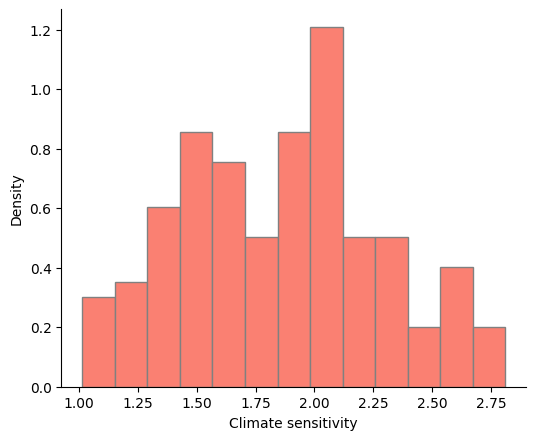

In [2]:
# climate sensitivity histogram
θ_list = pd.read_csv('data/model144.csv', header=None).to_numpy()[:, 0]/1000. 
plt.figure(figsize=(6,5), dpi=100)
plt.hist(θ_list*1000, bins=13, density=True, color="salmon", ec="gray")
plt.xlabel("Climate sensitivity")
plt.ylabel("Density")
plt.show()

### 1.4 Economic damages
  
The local evolution of damages is given by

$$
d \log N_t = \mu_n(Y_t, Z_t,F_t) dt + \sigma_n(Y_t, Z_t, F_t) \cdot dW_t 
$$

where 
\begin{equation*}
\mu_n(y, z,f)   =   \left\{ \begin{matrix} \left(\gamma_1 + \gamma_2 y\right)  \mu_y(z,f)  + {\frac 1 2} \gamma_2 |\sigma_y(z, f)|^2+ \iota_n \cdot \mu_z(z) &  y < {\overline y} \cr
\left[\gamma_1 + \gamma_2 y + \gamma_3(y  - {\overline y} ) \right] \mu_y(z, f)   + {\frac 1 2} (\gamma_2 + \gamma_3) |\sigma_y(z, f)|^2  + \iota_n \cdot \mu_z(z)  & y > {\overline y} \end{matrix} \right.
\end{equation*}

and

\begin{equation*}
\sigma_n(y,z,f)  = \left\{ \begin{matrix} \left(\gamma_1 + \gamma_2 y\right)  \sigma_y(z,f)  + (\iota_n)' \sigma_z(z) &  y < {\overline y} \cr
\left[\gamma_1 + \gamma_2 y + \gamma_3(y  - {\overline y} ) \right] \sigma_y(z,f)    + (\iota_n)' \sigma_z(z)  & y > {\overline y} \end{matrix} \right. 
\end{equation*}

To capture damage function uncertainty, we posit a jump process with $m$ absorbing states.  Each state corresponds to 
a value of $\gamma_3$ starting at the jump point. We impose a jump intensity function that is, by design, localized at $ y = {\overline y}$: 

$$
{\mathcal I} (y) = \left\{ \begin{matrix} \left(\frac 1  {\sqrt{2}\rho} \right) \exp\left[ - \frac {\left(y - \overline y \right)^2 } {2 \rho^2  } \right] & y < {\overline y} \cr \left(\frac 1 {\sqrt{2}\rho} \right) & y \ge  {\bar y} \end{matrix}  \right.
$$

which becomes concentrated in the neighborhood of ${\bar y}$ for $\rho$ small.  This intensity is recognizable as the scaled version of  half normal density. A large intensity informs us that a jump is likely.  We let ${ \pi}_j^p$  be the probabilities conditioned on the jump.  When the process jumps to state $j$, the parameter $\gamma_3^j$ is revealed and the continuation value function is $\phi_j$.  

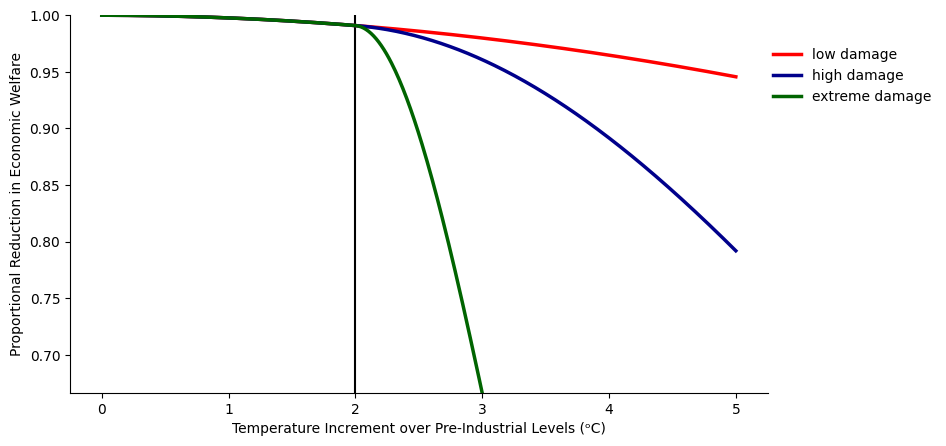

In [3]:
# Add damage function plots here (three damages)
γ1 = 1.7675/10000
γ2 = .0022*2
γ3_list = np.array([0, .0197*2, .3853*2])
y = np.linspace(0,5,500)
ȳ = 2
plt.figure(figsize=(9,5), dpi=100)
for γ3,  name, color in zip(γ3_list, ["low", "high", "extreme"], ["red", "darkblue", "darkgreen"]):
    plt.plot(y, np.exp( - γ1*y - γ2/2*y**2 - γ3/2*(y - ȳ)**2*(y>ȳ)), 
             color=color, linewidth=2.5, label=name+" damage")
plt.vlines(2, ymin=2/3, ymax=1, color="black")
plt.ylim(2/3,1)
plt.legend(loc=(1,0.75))
plt.xlabel("Temperature Increment over Pre-Industrial Levels (ᵒC)")
plt.ylabel("Proportional Reduction in Economic Welfare")
plt.show()

## 2. Uncertainty aversion

The model so far is one of risk as captured by the stochastic specification of shocks.  The presence of shocks opens the door to a comprehensive assessment of uncertainty conceived more broadly.  Specification uncertainty faced by a decision maker can be discussed in the formal stochastic structure.  We analyze this uncertainty using the formalism of decision theory under uncertainty.  We apply two versions of such theory, one comes under the heading of variational preferences and the other under smooth ambiguity preferences.  We adapt both to continuous time specifications, which facilitates their implementation and interpretation.  We use this decision theory to reduce the sensitivity analysis to a one or two dimensional parameterization that locates the potential misspecification that is most consequential to a decision maker.  Our aim is to provide a more complete uncertainty quantification within the setting of the decision problem.  

### 2.1 Misspecified Brownian motion

The potential misspecification of a Brownian motion has a particularly simple form.  It is known from the famed Girsanov Theorem that a change in distribution represented by a likelihood ratio is a drift distortion.  Under such a change in probability distribution, the $dW_t$ is a Brownian increment with a drift that can be state dependent, which we denote $H_t dt$.  Thus we modify our (locally) normally distributed shocks by entertaining a possible mean distortion.  
We use a relative entropy penalty, which for a continuous time Brownian specification is the quadratic ${\frac 1 2} |H_t|^2 dt$.  This formulation leads to a straightforward adjustment to an HJB equation.  Let $\phi$ denote a value function defined as a function of the Markov state
$X_t$.  Suppose the local  Brownian contribution to the state evolution $dX_t$ is $\sigma_x(X_t) H_tdt$.  Then $H_tdt$ contributes 
$\sigma_x(X_t) H_t dt$ to the state evolution.   

As part of recursive robustness adjustment, we solve

$$
\min_h \left(\frac {\partial \phi}{\partial x}\right)\cdot \left(\sigma_x h \right) + {\frac {\xi_b} 2} |h|^2. 
$$

where $\xi_b$ is penalty parameter capturing aversion to potential misspecification.  The solution to this minimization problem is:
\begin{equation} \label{worst_robust}
h^* = - \frac 1 {\xi_b} {\sigma_x}' \left(\frac {\partial \phi}{\partial x}\right)
\end{equation}
with minimized objective:

$$
- \frac {1}  {2 \xi_b} \left( \frac {\partial \phi}{\partial x}\right)' \sigma_x {\sigma_x}' \left(\frac {\partial \phi}{\partial x}\right)
$$

The change in the local evolution for $dX_t$ is  

$$
-  \frac 1 {\xi_b} \sigma_x {\sigma_x}' \left(\frac {\partial \phi}{\partial x}\right)
$$

We explore aversion to the misspecification of Brownian risk by including this term in the HJB equation.  Large values of $\xi_w $ make this contribution less consequential. While the direct impact is evident from the division by $\xi_w$, the value function, and hence its partial derivative, also depends on $\xi$.  The partial derivative of the value function is included to locate distortions that matter to the decision maker.

### 2.2 Misspecified jump process

There are two ways that a jump process could be misspecified.  The jump intensity governing locally the jump probability could be wrong or the probability distribution across the alternative states, in this case damage function specifications, could  be mistaken.  We capture both forms of misspecification by introducing positive random variables $G_t^j \ge 0 $ for each alternative damage model $j$ with local evolution:

$$
{\mathcal I}(Y_t)\sum_{j=1}^m G_t^j {\pi}_j^p \left[ \phi_j  - \phi \right] 
$$

where the implied intensity is

$$
{\mathcal I}(Y_t) {\overline G}_t
$$

for 

$$
{\overline G}_t \doteq \sum_{j=1}^m G_t^j {\pi}_j^p. 
$$

The altered probabilities conditioned on a jump taking place is:

$$
\frac {G_t^j {\pi}_j^p}{ {\overline G}_t}   \hspace{1cm} j=1,2,...,m.
$$

The local relative entropy  for a discrepancy in the jump process is:

$$
{\mathcal I}(Y_t) \sum_{j=1}^m {\pi}_j^p\left( 1 - G_t^j + G_t^j \log G_t^j  \right) \ge 0
$$

This measure is nonnegative because the convex function $g \log g$ exceeds its gradient $g - 1$  evaluated at $g=1$.   

To determine a local contribution to an HJB equation, we solve:

$$
\min_{g^j: j=1,2,...,m}    {\mathcal I}\sum_{j=1}^m g^j \pi_j^p \left( \phi_j  - \phi \right)   + \xi_p \mathcal I \sum_{j=1}^m \pi_j^p \left( 1 - g^j + g^j \log g^j  \right) 
$$

The minimizers are:

$$
g_j^* = \exp\left[  \frac 1 {\xi_p}\left( \phi - \phi_j \right) \right].  
$$

implying a minimized objective:  

$$
\xi_p {\mathcal I} \sum_{j=1}^m \pi_j^p \left( 1 - \exp \left[\frac 1 {\xi_p} \left( \phi - \phi_j \right) \right]\right) = - \left(\xi_p {\mathcal I}\right) \frac {\sum_{j=1}^m \pi_j^p \exp \left(- \frac 1 {\xi_p} \phi_j\right) - \exp \left(- \frac 1 {\xi_p} \phi \right)}{\exp \left(- \frac 1 {\xi_p} \phi \right)}
$$


### 2.3 Local ambiguity aversion

To assess the consequences of the heterogeneous responses from alternative climate models, we use what are called smooth 
ambiguity preferences.  In deploying such preferences, we use a robust prior interpretation in conjunction with the continuous time formulation of smooth ambiguity proposed by Hansen and Miao.  Suppose that we have $n$ different climate model drift specifications for $\mu_x^i$ for model $i$.  Let $\pi^a_i$ denote the probability of drift model $i$.  Standard model averaging would have use

$$
\sum_{i=1}^n \pi^a_i \mu_x^i 
$$

and the drift.  Our decision maker is uncertain about what weights to assign but uses an initial set of weights as a baseline.  For instance, in our computations we will treat a collection of models with equal probability under a baseline and look for a robust adjustment to these probabilities.  Under ambiguity aversion the decision maker with value function $\phi$ solves 

$$
\min_{\pi_i, i=1,2,..., n}\sum_{i=1}^n \pi_i \left[ \left(\frac {\partial \phi}{\partial x}\right) \cdot \mu_x^i  + \xi_a \left(\log \pi_i - \log \pi_i^a\right) \right] 
$$

The minimizing probabilities satisfy:

$$
\pi_i^* \propto \pi_i^a \exp\left[ -{\frac 1 {\xi_a}} \left(\frac {\partial \phi}{\partial x}\right) \cdot \mu_x^i \right]
$$

with minimized objective:

$$
- \xi_a \log \sum_{i=1}^n \pi_i^a \exp\left[ -{\frac 1 {\xi_a}} \left(\frac {\partial \phi}{\partial x}\right) \cdot \mu_x^i \right]
$$

In contrast to the robustness adjustment used for model misspecification, this approach adds more structure to the drift distortions with the implied distortion to the evolution $dX_t$

$$
\sum_{i=1} \pi_j^* \mu_x^j 
$$

We have introduced three different parameters $(\xi_b, \xi_p, \xi_a)$ that guide our sensitivity analysis.   Anderson, Hansen, Sargent suggest that $\xi_b = \xi_p$.  They also suggest ways to calibrate this parameter based on statistical detection challenges.  As the smooth ambiguity model also induces a drift distortion, we can adjust the $\xi_a$ parameter to have a structured drift distortion of a comparable magnitude.  We also are guided by an approach from robust Bayesian analysis attributed to Good that inspects the implied distortions for a *priori* plausibility.  
In our  pedagogical discussion so far,  we have seemingly ignored possible interactions between damage uncertainty and climate uncertainty.  In fact, these interactions will be present as climate change uncertainty will impact the value function contributions given by the $\phi_j$'s and by $\phi$.  


## 3. A climate component of the planner's HJB

As we show in the appendix, the planners HJB equation conveniently separates into three different components.  We focus here on the component that includes the choice emissions, $\mathcal{E}_t$.  Let $ \mathcal{\widetilde E}_t = \iota_y \cdot Z_t \mathcal{E}_t$, which we will use as a transformed 
control variable.   In the absence of any specification uncertainty, the HJB equation of interest for $y <  {\bar y}$ prior to Poisson jump is:

\begin{align} \label{HJB_no}
0 = \max_{\tilde e} 
& - \delta \phi(y)    +  \eta \log \tilde e   \cr 
& + \frac {d \phi(y)}{d y}  \sum_{i=1}^n \pi^a_i  \theta_i {\tilde e} + {\frac 1 2} \frac {d^2 \phi(y)}{(dy)^2} |\varsigma|^2 \tilde e^2  \cr
&+ \frac{(\eta - 1)}{\delta} \left[  \left( \gamma_1 + \gamma_2 y \right)  \sum_{i=1}^n \pi^a_i \theta_i {\tilde e} + {\frac 1 2} \gamma_2 |\varsigma|^2 \tilde e^2 \right]\cr
& + {\mathcal I}(y)  \sum_{m=1}^M \pi_m^p \left( \phi_m - \phi \right) 
\end{align} 

for a value function given by $\phi(y) + \frac{(\eta - 1)}{\delta} n$.  This is an equation in the value function $\phi$ but the depends on the continuation value functions $\phi_m$ pertinent after the tail of damage function is realized.  These value functions solve equations:

\begin{align*}
0 = \max_{\tilde e} 
& - \delta \phi_j(y)    +  \eta \log \tilde e    \cr 
& + \frac {d \phi_j(y)}{d y}  \sum_{i=1}^n \pi^a_i  \theta_i {\tilde e} + {\frac 1 2} \frac {d^2 \phi_j(y)}{(dy)^2} |\varsigma|^2 \tilde e^2  \cr
&+ \frac{(\eta - 1)}{\delta} \left(  \left[ \gamma_1 + \gamma_2 y + \gamma_3^j (y - {\bar y})  \right]   \sum_{i=1}^n \pi^a_i \theta_i {\tilde e}
+ {\frac 1 2}(\gamma_2 + \gamma_3)   |\varsigma|^2 \tilde e^2  \right)
\end{align*} 
for $j=1,2,...,m$.  The solutions for these $m$ HJB equations are inputs in the first HJB equation.    Given the localized nature of the jump intensity, we expect

$$
\phi\left( {\bar y} \right) \approx \sum_{m=1}^M \pi_m^p \phi_m\left( {\bar y} \right).
$$

We now show the terms added in our sensitivity analysis:


- Brownian misspecification: include
$$
- \frac {\xi_b} 2 \left\vert\left[ \frac {d \phi(y)}{d y} + \frac{(\eta - 1)}{\delta}   \left( \gamma_1 + \gamma_2 y\right)  \right] \right\vert^2 |\varsigma|^2  \tilde e^2 .
$$
 
- Climate model ambiguity: replace 

$$
 \sum_{i=1}^n \pi_i^a  \theta_i \left[ \frac {d \phi(y)}{d y} + \frac{(\eta - 1)}{\delta}  \left( \gamma_1 + \gamma_2 y \right)\right] {\tilde e}
$$

with ambiguity adjusted certainty equivalent:

$$
- \xi_a \log \sum_{i=1}^n\pi_i^a \exp\left( - \frac 1 {\xi_a} \theta_i \left[\frac {d \phi(y)}{d y}  + \frac{(\eta -1)}{\delta} \left( \gamma_1 + \gamma_2 y \right) \right] {\tilde e}\right)
$$

- Jump misspecification: replace ${\mathcal I}(y)  \sum_{m=1}^M \pi_m^p \left[ \phi_m(y) - \phi(y)  \right] $ with:

$$
- \left(\xi_p {\mathcal I}\right) \frac {\sum_{m=1}^M \pi_m^p \exp \left(- \frac 1 {\xi_p} \phi_m\right) - \exp \left(- \frac 1 {\xi_p} \phi \right)}{\exp \left(- \frac 1 {\xi_p} \phi \right)}
$$

and make corresponding adjustments to the Brownian and climate model uncertainty contributions.  
When this jump risk adjustment is made, we expect:

$$
\phi(\overline y) \approx - \xi_p \log \sum_{m=1}^M \pi_m^p \exp \left[- \frac 1 {\xi_p} \phi_m({\overline y}) \right]
$$

where the right side is the certainty equivalent for an ambiguity  adjusted post jump continuation value.  For our computations, we impose this as a boundary value.  

In what follows we will impose these terms separately and with with the first and third or second and third.  The first and second give unstructured and structured ways to impose drift distortions.  While their comparison is interesting, we see little rationale to impose both of them simultaneously.

### 3.1 Computational details

Write down the false transient method here.

In [ ]:
### Solve the HJB without jump and with jump
### Try different ξ values

Continue to the next section
    
[Section 6: A climate component of a planner's decision problem](sec6_DecisionProblem.ipynb)